In [1]:
# Import 需要的套件
import os
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# 設定 data_path
dir_data = '../data/'
f_app_train = os.path.join(dir_data, 'application_train.csv')
f_app_test = os.path.join(dir_data, 'application_test.csv')

app_train = pd.read_csv(f_app_train)
app_test = pd.read_csv(f_app_test)

from sklearn.preprocessing import LabelEncoder
#print(app_train.shape)
# Create a label encoder object
le = LabelEncoder()
le_count = 0
#print(app_test.columns)
# Iterate through the columns
for col in app_train:
    #print("column "+col+" size changes from 1 to ",(pd.get_dummies(app_train[col]).shape[1]))
    if app_train[col].dtype == 'object':
        # If 2 or fewer unique categories
        if len(list(app_train[col].unique())) <= 2:
            # Train on the training data
            le.fit(app_train[col])
            # Transform both training and testing data
            app_train[col] = le.transform(app_train[col])
            app_test[col] = le.transform(app_test[col])
            # Keep track of how many columns were label encoded
            le_count += 1
app_train = pd.get_dummies(app_train)
app_test = pd.get_dummies(app_test)
print(app_train.shape)
# Create an anomalous flag column
app_train['DAYS_EMPLOYED_ANOM'] = app_train["DAYS_EMPLOYED"] == 365243
app_train['DAYS_EMPLOYED'].replace({365243: np.nan}, inplace = True)
# also apply to testing dataset
app_test['DAYS_EMPLOYED_ANOM'] = app_test["DAYS_EMPLOYED"] == 365243
app_test["DAYS_EMPLOYED"].replace({365243: np.nan}, inplace = True)

# absolute the value of DAYS_BIRTH
app_train['DAYS_BIRTH'] = abs(app_train['DAYS_BIRTH'])
app_test['DAYS_BIRTH'] = abs(app_test['DAYS_BIRTH'])

(307511, 243)


### 相關係數
一樣，pandas 很貼心地讓我們可以非常容易計算相關係數

In [3]:
corr_about_TARGET = app_train.corr()['TARGET']

## 練習時間
列出目標 (TARGET) 與所有欄位之間相關係數，數值最大以及最小各 15 個

通過相關係數的結果觀察有興趣的欄位與 TARGET 或其他欄位的相關係數，並嘗試找出有趣的訊息
- 最好的方式當然是畫圖，舉例來說，我們知道  EXT_SOURCE_3 這個欄位和 TARGET 之間的相關係數是 -0.178919 (在已經這個資料集已經是最負的了！)，那我們可以 EXT_SOURCE_3  為 x 軸， TARGET 為 y 軸，把資料給畫出來

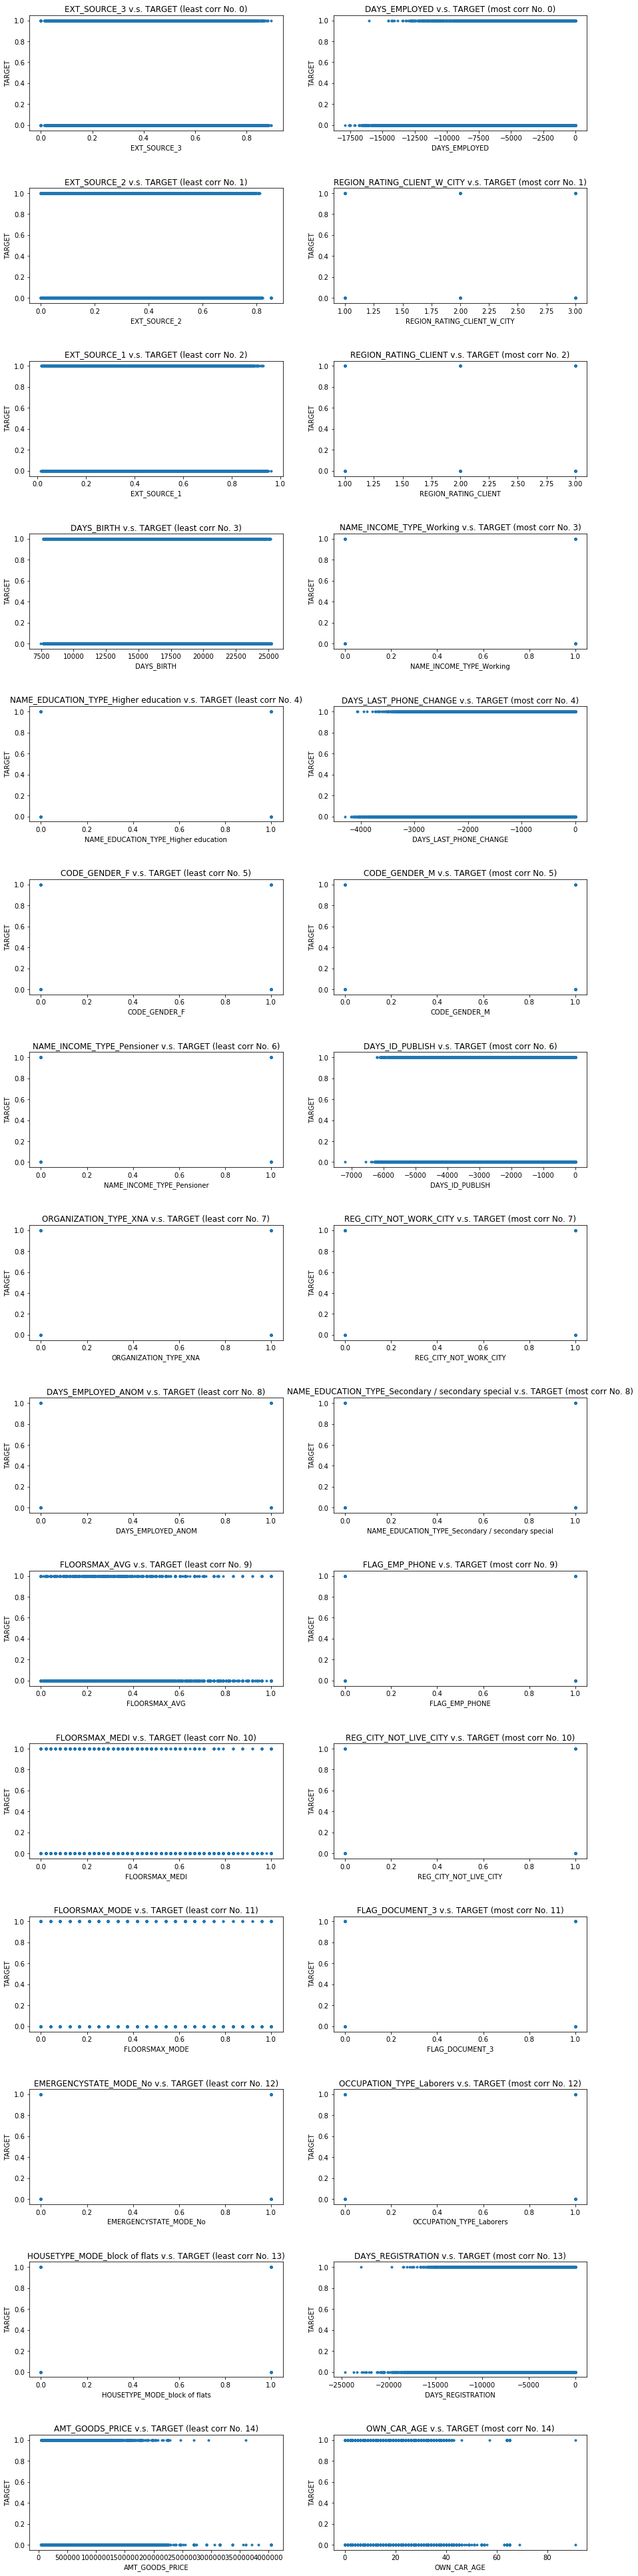

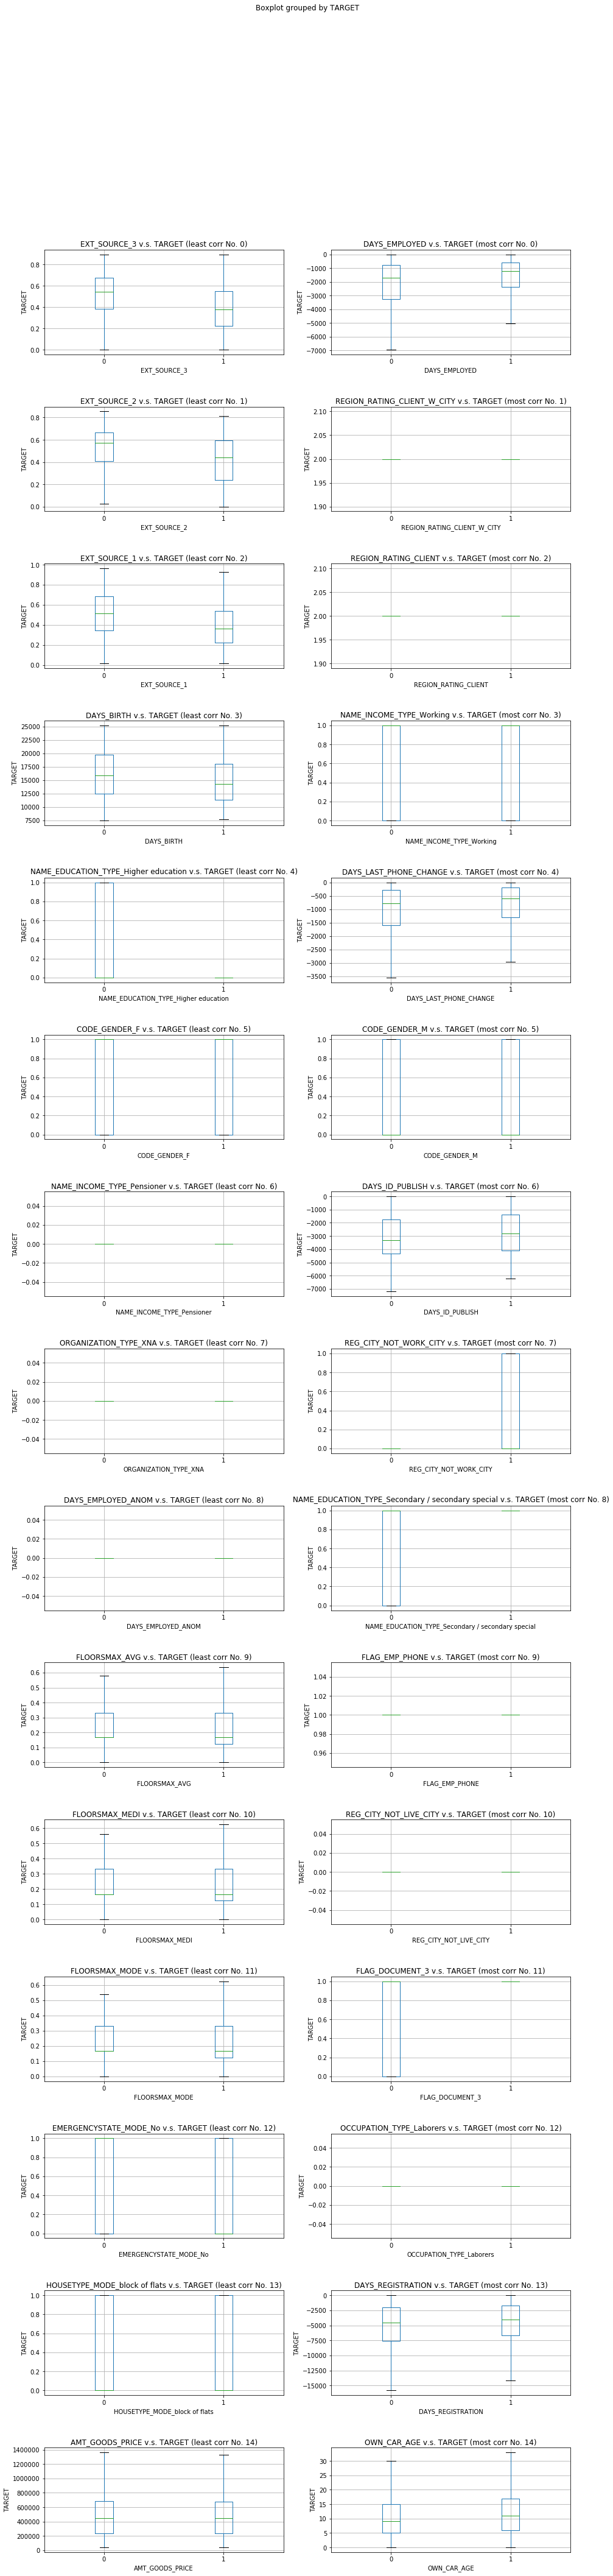

In [8]:
sorted_corr = corr_about_TARGET.sort_values()
min_corr = sorted_corr[0:15]
max_corr = sorted_corr[-2:-17:-1]
# print("min_corr = \n",min_corr)
# print("\nmax_corr = \n",max_corr)

plt.figure(1,figsize=(15,70))
plt.subplots_adjust(hspace=0.5)
for i in range(15):
    plt.subplot(15,2,i*2+1)
    plt.plot(app_train[min_corr.index[i]],app_train['TARGET'],'.')
    plt.title(min_corr.index[i]+" v.s. TARGET (least corr No. "+str(i)+")")
    plt.xlabel(min_corr.index[i])
    plt.ylabel('TARGET')
    plt.subplot(15,2,i*2+2)
    plt.plot(app_train[max_corr.index[i]],app_train['TARGET'],'.')
    plt.title(max_corr.index[i]+" v.s. TARGET (most corr No. "+str(i)+")")
    plt.xlabel(max_corr.index[i])
    plt.ylabel('TARGET')
plt.show()

plt.figure(2,figsize=(15,70))
plt.subplots_adjust(hspace=0.5)
for i in range(15):
    plt.subplot(15,2,i*2+1)
    app_train.boxplot(ax=plt.gca(),column=(min_corr.index[i]),by=['TARGET'],showfliers=False)
    plt.title(min_corr.index[i]+" v.s. TARGET (least corr No. "+str(i)+")")
    plt.xlabel(min_corr.index[i])
    plt.ylabel('TARGET')
    plt.subplot(15,2,i*2+2)
    app_train.boxplot(ax=plt.gca(),column=(max_corr.index[i]),by=['TARGET'],showfliers=False)
    plt.title(max_corr.index[i]+" v.s. TARGET (most corr No. "+str(i)+")")
    plt.xlabel(max_corr.index[i])
    plt.ylabel('TARGET')
plt.show()

#app_train.boxplot(column=plt_column, by = plt_by, showfliers = False, figsize=(12,12))

# plt.plot(sub_df['DAYS_EMPLOYED'] / (-365), sub_df['AMT_INCOME_TOTAL'], '.')
# plt.xlabel('Days of employed (year)')
# plt.ylabel('AMT_INCOME_TOTAL (raw)')
# plt.show()


In [7]:
# xx = pd.DataFrame({'col1':['A','B','C','A','C','B','C','A'],'col2':['0','3','6','8','3','6','8','0']})
# print(pd.get_dummies(xx))